In [1]:
# -*- encoding: utf-8 -*-
'''
@File    :   ismn_pos.ipynb
@Author  :   Gulin Ran 
@Mail    :   gulinr@whu.edu.cn 
@Version :   1.0
@Time    :   2022/08/29 21:38:11
@License :   Licensed under the MIT license
@Desc    :   None
'''
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER,LONGITUDE_FORMATTER
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from pytesmo.time_series import anomaly as pyan
from collections import Counter
import sys
from matplotlib.font_manager import FontProperties
cn_font = FontProperties(fname=r"c:\windows\fonts\SimHei.ttf", size=20)

In [2]:
csvfolder = r'G:\ismn_data\ismn_gloab_data'
folder_output = r'G:\ismn_data\ismn_gloab_data'

df = pd.read_csv(os.path.join(csvfolder,'new_ismn_pts.csv'))
df.drop(columns=['pyid'],inplace=True)
network_list = df['network'].drop_duplicates().tolist()
df

,network,Station,Lon,Lat
0,AMMA-CATCH,Banizoumbou,2.66040,13.53250
1,AMMA-CATCH,Belefoungou-Mid,1.70994,9.79506
2,AMMA-CATCH,Belefoungou-Top,1.70994,9.78986
3,AMMA-CATCH,Nalohou-Mid,1.60530,9.74530
4,AMMA-CATCH,Nalohou-Top,1.60580,9.74407
...,...,...,...,...
2458,PTSMN,Site-9,175.90189,-40.73486
2459,LAB-net,ChamonateCalibrationSite,-70.45208,-27.29491
2460,LAB-net,NirehuaoSite,-71.75350,-45.26482
2461,LAB-net,OromoCalibrationSite,-73.10873,-40.88502


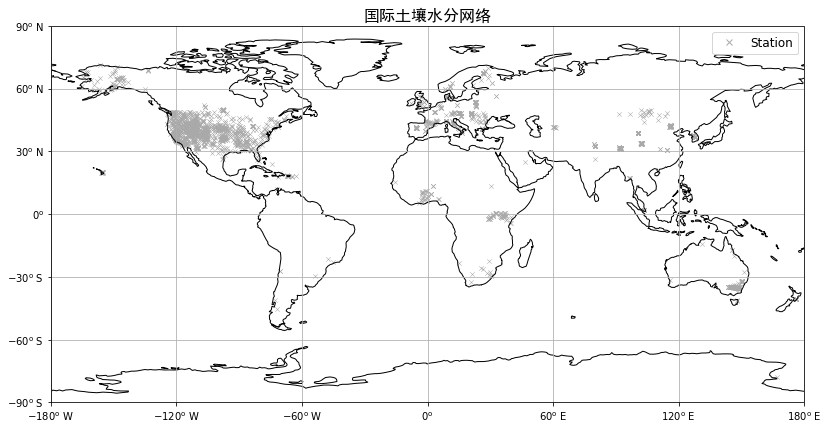

In [3]:
fig = plt.figure(figsize=(13.5,9))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax = plt.axes(projection=ccrs.Robinson())
# ax.set_extent([-130, -60, 19, 46])
ax.coastlines(resolution='110m',color='black')
ax.set_global()

ax.set_xticks([-180,-120,-60, 0, 60,120,180])
ax.set_xticklabels([r'$\mathregular{-180^o}$ W',r'$\mathregular{-120^o}$ W',r'$\mathregular{-60^o}$ W',
                    r'$\mathregular{0^o}$',
                    r'$\mathregular{60^o}$ E',r'$\mathregular{120^o}$ E',r'$\mathregular{180^o}$ E'])
ax.set_yticks([90,60,30, 0,-30,-60, -90])
ax.set_yticklabels([r'$\mathregular{90^o}$ N', r'$\mathregular{60^o}$ N', r'$\mathregular{30^o}$ N',
                   r'$\mathregular{0^o}$',
                   r'$\mathregular{-30^o}$ S', r'$\mathregular{-60^o}$ S', r'$\mathregular{-90^o}$ S'])
dummy_scatter = Line2D([0], [0], linestyle='none', marker='x', color='#a9a9a9', markersize=7)
title = '国际土壤水分网络'
ax.set_title(f'{title}', fontsize=16,fontproperties=cn_font)
# ax.add_feature(cfeature.OCEAN, edgecolor='black',color = cfeature.COLORS['water'])
# ax.add_feature(cfeature.LAND, color = '#f1f1f2')
# ax.add_feature(cfeature.STATES,edgecolor='black',alpha=0.5)

ax.gridlines(draw_labels=False)
labels = list(network_list)
for network in network_list:
    df2 = df[df['network'] == network]
    plt.scatter(x=df2['Lon'].tolist(),
                y=df2['Lat'].tolist(),
                color = '#a9a9a9',
                # c=df2['Color'].tolist(),
                s=20,
                edgecolors='black',
                alpha=1,
                linewidths=0.5,
                transform=ccrs.PlateCarree(),
                marker='x',
                cmap='gnuplot2',
                label=network)
plt.legend([dummy_scatter], ['Station'],loc='upper right',
           fontsize=12,
           markerscale=0.8,
           frameon=True)
# ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m',
#                                         edgecolor='face',
#                                         facecolor=cfeature.COLORS['land']))
# plt.legend(numpoints=1,ncol=6,loc=0,title='ISMN Network')

# plt.savefig(os.path.join(folder_output, 'statiob.pdf'), dpi=300)
# plt.savefig(os.path.join(folder_output, 'statiob.png'), dpi=300)
# fig.savefig(os.path.join(r'D:\cn_plot', 'ISMN.jpg'), dpi=150)